Exercice 1

In [231]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.fft import fft, fftfreq

On commence par trouver les deux équations du mouvement, une par masse. Pour ça on utilise l'équation de Newton: sommes des force = mass * accélération. Les forces qui s'appliquent sur une des masse sont celle du ressort entre elle et le mur (-k*x1) avec x1 le déplacement de la première masse par rapport à sa position au repos et la force du ressort entre les deux masses. Celle-ci dépend de la position de la deuxième masse: -k2*(x1-x2). Si on additionne ces forces et qu'on les divise par la masse on a l'accélération pour la première masse. La deuxième masse est très similaire.

In [232]:
k=4  # N/m
k2=0.5 # N/m
m1=1  # kg
m2=1  # kg
x1=1  # m
x2=0  # m
v1=0  # m/s
v2=0  # m/s
a1= -((k+k2)*x1)/m1 +(k2*x2)/m1 # m/s^2
a2= -((k+k2)*x2)/m2 +(k2*x1)/m2 # m/s^2


Ci-dessus on a mis toutes les variables avec les unités en vert. k= constante de raideur du ressort (défini dans la partie 4 de l'exercice), m la masse, x la position en rapport avec l'équilibre, v la vitesse et a l'accélération. (les masses m1 et m2 sont les même mais je l'ai mis dans deux différentes variables pour pouvoir observer les différences si l'on changeait les poids.)

Ensuite, on définit y comme dans la donnée de l'exercice (y=(x1, x2, v1, v2)):


In [233]:
y=[x1,x2,v1,v2]

En-dessous, on écrit la fonction (equations_motion) qui retourne dy/dt avec le premier argument le temps t et le deuxieme argument y. 

In [234]:

def equations_motion(t,y):
    x1, x2, v1, v2 = y
    a1= -((k+k2)*x1)/m1 +k2*x2/m1 # m/s^2
    a2= -((k+k2)*x2)/m2 +k2*x1/m2 # m/s^2
    return [v1, v2, a1, a2]


On sait que la dérivé de la postion par rapport au temps = vitesse et la dérivé par rapport au temps de la vitesse donne l'accélération, donc le retour fait du sens.

Le temps a été défini entre 0 et 40 secondes et y = (1,0,0,0) (soit les positions et les vitesses au temps 0). On a préciser qu'on voulait utiliser la méthode Runge-Kutta en mettant "method=RK45" mais ce n'était pas nécessaire comme c'est la méthode par défault.
Après, on a écrit le code pour la représentation graphique du système de ressort, avec le déplacement en rapport au temps

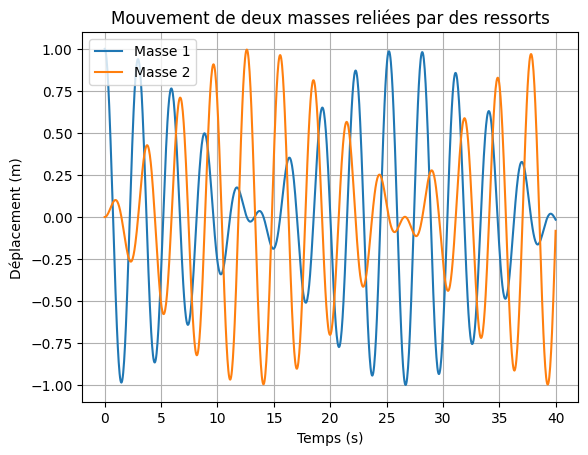

In [235]:
temps = (0, 40)
y0 = [1, 0, 0, 0]  # conditions initiales: x1=1, x2=0, v1=0, v2=0
sol = solve_ivp(equations_motion, temps, y0, t_eval=np.linspace( *temps , 1000), method='RK45')
plt.plot(sol.t, sol.y[0], label='Masse 1')
plt.plot(sol.t, sol.y[1], label='Masse 2')
plt.xlabel('Temps (s)')
plt.ylabel('Déplacement (m)')
plt.title('Mouvement de deux masses reliées par des ressorts')
plt.legend()
plt.grid()
plt.show()  


On peut voir dans le graphique ci-dessus qu'il y a une oscillation. La masse 1 commence avec un déplacement de 1 m et l'autre masse commence depuis la position du repos. Quand la masse 1 se déplace fortement, elle entraine la masse 2 et la masse 2 ralentit la masse 1 et inversement. Le graphique est très joliment visible quant on utilise un temps de 40 secondes, si le temps et plus court alors on manque de voir la fréquence qui se répète et si il est trop long alors les oscillation deviennent floue (car elles sont trop proches les unes des autres).



Le temps pour la prochaine partie a été rallongé car si l'on utilisait 40 seconde (au lieu de 200), on ne verrait qu'un seul pique grossier.

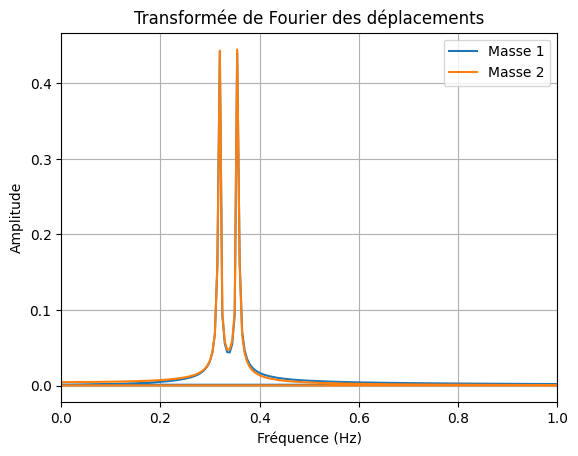

In [236]:
#transformée de Fourier
temps = (0,200)
sol = solve_ivp(equations_motion, temps, y0, t_eval=np.linspace( *temps , 1000), method='RK45')
N = len(sol.t) # nombre de points
T = sol.t[1] - sol.t[0]  # intervalle de temps
yf1 = fft(sol.y[0]) # transformée de Fourier de la position de la masse 1 y(0) = x1 (voir en haut)
yf2 = fft(sol.y[1]) # transformée de Fourier de la position de la masse 2
xf = fftfreq(N, T) # fréquences associées 
plt.plot(xf, np.abs(yf1)/N*2, label='Masse 1') 
plt.plot(xf, np.abs(yf2)/N*2, label='Masse 2')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Transformée de Fourier des déplacements')
plt.xlim(0, 1)
plt.legend()
plt.grid()
plt.show()  

Il y a deux piques distincts, les deux masses ont des piques de fréquence au même endroit, ce qui est attendu. Pour prédire où trouver ces piques, on peut calculer les deux fréquence propres et donc les oméga 1 et 2 (la pulsation en s^-1):
-Quand les deux masses bougent dans le même sense alors Oméga 1 = sqrt{k/m1}
-Quand les masses bougent en sens opposé alors Oméga 2 = sqrt{(k+2*k2)/m1}

Les fréquences trouvées sur le graph ci-dessus peuvent être calculées en divisant les omégas par 2*pi:

In [237]:
oméga1 = np.sqrt(k/m1)
oméga2 = np.sqrt((k + 2*k2)/m1)
f1 = oméga1/(2*np.pi)
f2 = oméga2/(2*np.pi)
print(f"Fréquence propre 1: {f1:.3f} Hz")
print(f"Fréquence propre 2: {f2:.3f} Hz")

Fréquence propre 1: 0.318 Hz
Fréquence propre 2: 0.356 Hz


Les fréquence calculées correspondent à celle du graph en Hz.

Ensuite pour comparer avec un oscillateur simple, il faut qu'on refasse la première partie seulement avec un poid et un ressort. Cette fois la somme des force est constituée d'une seule force, celle du ressort, donc l'accélération est donnée par cette force divisée par la masse: 



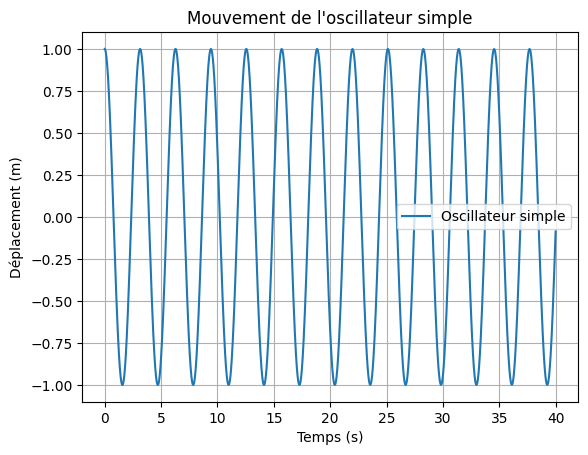

In [238]:
k3=4 # N/m
m3=1  # kg
x3=1  # m
v3=0  # m/s
a3= -((k3)*x3)/m3  # m/s^2
def oscillateur_simple(t,y):
    x3, v3 = y
    a3= -((k3)*x3)/m3  # m/s^2
    return [v3, a3]
temps3 = (0, 40)
y03 = [1, 0]  # conditions initiales: x3=1, v3=0
sol3 = solve_ivp(oscillateur_simple, temps3, y03, t_eval=np.linspace( *temps3 , 8000), method='RK45')
plt.plot(sol3.t, sol3.y[0], label='Oscillateur simple')
plt.xlabel('Temps (s)')
plt.ylabel('Déplacement (m)')
plt.title('Mouvement de l\'oscillateur simple')
plt.legend()
plt.grid()
plt.show()

Maintenant qu'on a refait l'exercice avec un oscillateur simple on peut comparer sa transformée de Fourier avec celle de l'oscillateur couplé.

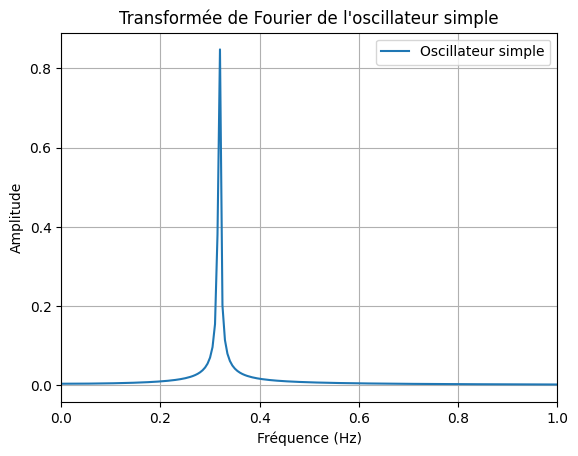

In [239]:
#transformée de Fourier de l'oscillateur simple
temps3 = (0,200)
y03 = [1, 0]  # conditions initiales: x3=1, v3=0
sol3 = solve_ivp(oscillateur_simple, temps3, y03, t_eval=np.linspace( *temps3 , 8000), method='RK45')
N3 = len(sol3.t) # nombre de points
T3 = sol3.t[1] - sol3.t[0]  # intervalle de temps
yf3 = fft(sol3.y[0]) # transformée de Fourier de la position de l'oscillateur simple
xf3 = fftfreq(N3, T3)[:N3//2] # fréquences associées  
plt.plot(xf3, 2.0/N3 * np.abs(yf3[0:N3//2]), label='Oscillateur simple') 
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Transformée de Fourier de l\'oscillateur simple')
plt.xlim(0, 1)
plt.legend()
plt.grid()
plt.show()

Logiquement, l'amplitude est deux fois plus élevée que dans l'oscillateur couplée car tout le mouvement de l'oscillateur simple est concentré en un seul pique tandis que l'oscillateur couplé voit son "énergie" dilué en deux.
Dans le but de comparer l'oscillateur simple et l'oscillateur couplé, on peut calculer la fréqunce propre de ce dernier:

In [240]:
oméga3 = np.sqrt(k3/m3)
f3 = oméga3/(2*np.pi)
print(f"Fréquence propre de l'oscillateur simple: {f3:.3f} Hz")

Fréquence propre de l'oscillateur simple: 0.318 Hz


Comme prévu cette fréquence propre correspond à la première fréquence propre de l'oscillateur couplé (car ils ont la même k).

La partie 6. du premier exercice a été volontairement séparée pour avoir plus de clareté.